In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("C:/Users/varsh/Downloads/archive (2)/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print(df.shape)
print(df.info())
print(df.head())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [8]:
data = df[[ 'MonthlyCharges', 'tenure','TotalCharges', 'Contract', 'Churn']]  


In [9]:
data.head()

,MonthlyCharges,tenure,TotalCharges,Contract,Churn
0,29.85,1,29.85,Month-to-month,No
1,56.95,34,1889.5,One year,No
2,53.85,2,108.15,Month-to-month,Yes
3,42.30,45,1840.75,One year,No
4,70.70,2,151.65,Month-to-month,Yes


In [10]:
le =LabelEncoder()
data["Contract"] = le.fit_transform(data["Contract"])          
data["Churn"] = le.fit_transform(data["Churn"]) 


In [11]:
data.head()

,MonthlyCharges,tenure,TotalCharges,Contract,Churn
0,29.85,1,29.85,0,0
1,56.95,34,1889.5,1,0
2,53.85,2,108.15,0,1
3,42.30,45,1840.75,1,0
4,70.70,2,151.65,0,1


In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['TotalCharges'].fillna(0, inplace=True)

data['TotalCharges'] = data['TotalCharges'].round().astype(int)

print(data['TotalCharges'].dtype)


int64


In [13]:
for i in ["MonthlyCharges","tenure","TotalCharges", "Contract"]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower= Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR

    outlier= (data[i] < lower) | (data[i] > upper)
    outlier_count = outlier.sum()
    print(f"Outliers in {i}: {outlier_count}")

Outliers in MonthlyCharges: 0
Outliers in tenure: 0
Outliers in TotalCharges: 0
Outliers in Contract: 0


In [14]:

print(data[["MonthlyCharges","tenure","TotalCharges","Contract","Churn"]].describe())


       MonthlyCharges       tenure  TotalCharges     Contract        Churn
count     7043.000000  7043.000000   7043.000000  7043.000000  7043.000000
mean        64.761692    32.371149   2279.728525     0.690473     0.265370
std         30.090047    24.559481   2266.792771     0.833755     0.441561
min         18.250000     0.000000      0.000000     0.000000     0.000000
25%         35.500000     9.000000    399.000000     0.000000     0.000000
50%         70.350000    29.000000   1395.000000     0.000000     0.000000
75%         89.850000    55.000000   3786.500000     1.000000     1.000000
max        118.750000    72.000000   8685.000000     2.000000     1.000000


In [15]:

scaler = MinMaxScaler()
X_numeric = data[['MonthlyCharges','tenure','TotalCharges','Contract']]
X_scaled = scaler.fit_transform(X_numeric)

In [16]:
X = data[['MonthlyCharges', 'tenure', 'TotalCharges' ,'Contract']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


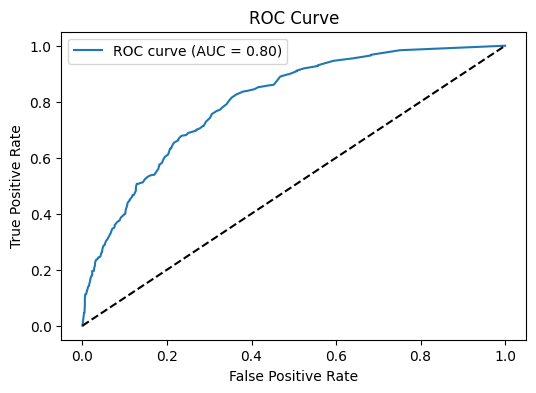

In [21]:
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7693399574166075
Precision: 0.58
Recall: 0.46648793565683644
F1 Score: 0.5170876671619614
ROC AUC Score: 0.7994167089341353

Confusion Matrix:
 [[910 126]
 [199 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.58      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



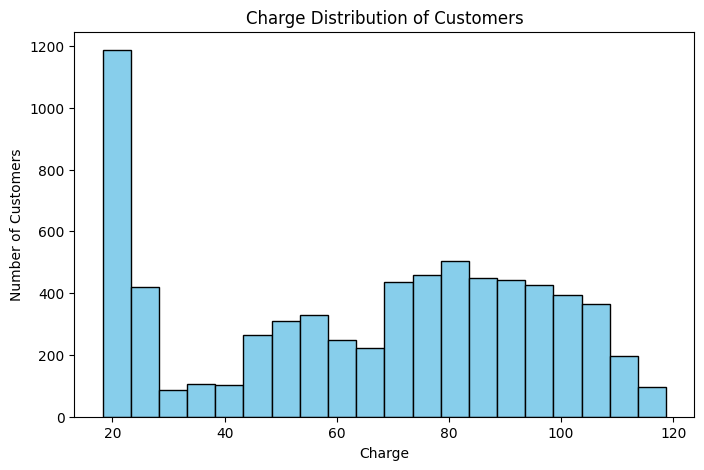

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(data['MonthlyCharges'], bins=20, color='skyblue', edgecolor='black')
plt.title("Charge Distribution of Customers")
plt.xlabel("Charge")
plt.ylabel("Number of Customers")
plt.show()

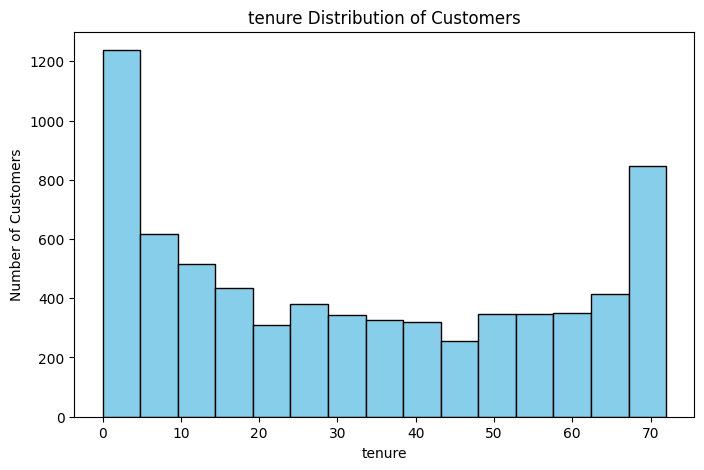

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(data['tenure'], bins=15, color='skyblue', edgecolor='black')
plt.title("tenure Distribution of Customers")
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.show()

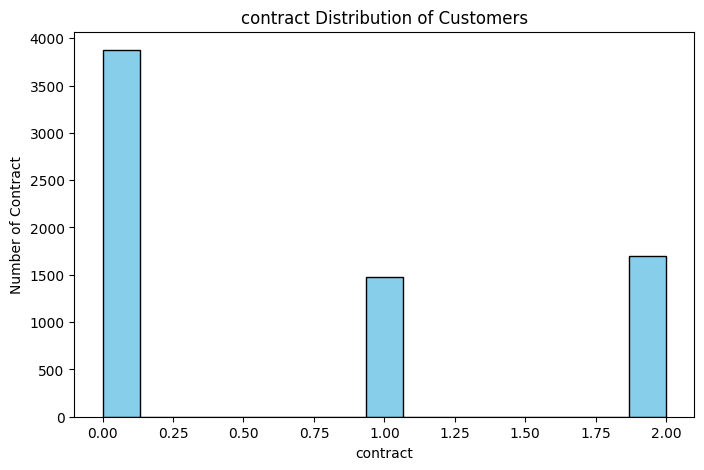

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(data['Contract'], bins=15, color='skyblue', edgecolor='black')
plt.title("contract Distribution of Customers")
plt.xlabel("contract")
plt.ylabel("Number of Contract")
plt.show()

                MonthlyCharges    tenure  Contract     Churn
MonthlyCharges        1.000000  0.247900 -0.074195  0.193356
tenure                0.247900  1.000000  0.671607 -0.352229
Contract             -0.074195  0.671607  1.000000 -0.396713
Churn                 0.193356 -0.352229 -0.396713  1.000000


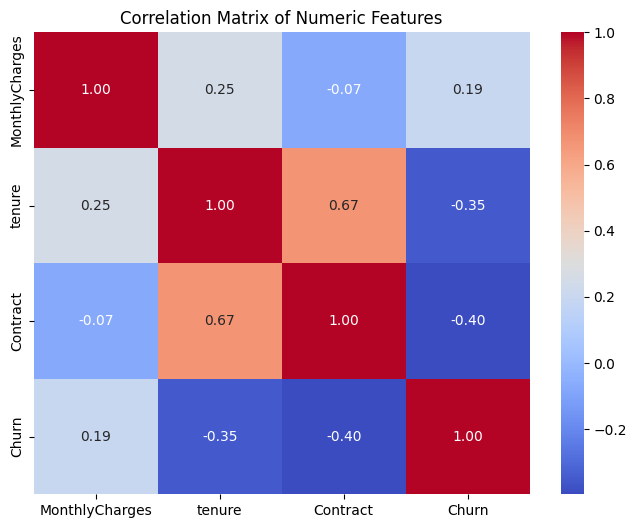

In [ ]:
numeric_cols = ['MonthlyCharges', 'tenure','Contract', 'Churn']

corr_matrix = data[numeric_cols].corr()

print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [24]:
import numpy as np

new_customer = np.array([[53.85,2,108.15,0	]]) 

prediction = rf.predict(new_customer)
probability = rf.predict_proba(new_customer)[0][1]

print("Prediction:", prediction[0])
print("Probability of churn:", probability)

Prediction: 1
Probability of churn: 0.71


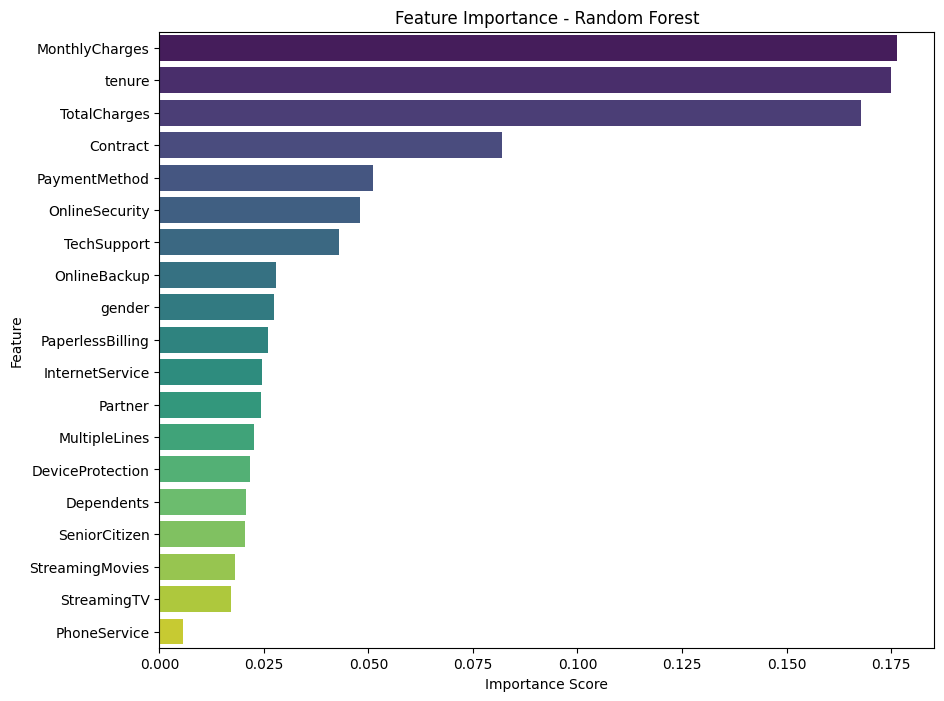

In [ ]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
            'MonthlyCharges','TotalCharges']


le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df[features]
y = df['Churn']
y = le.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [22]:
import pickle
filename = 'trained_model.pkl'


In [23]:
with open('trained_model.pkl', 'wb') as f:
    pickle.dump((rf, scaler), f)